In [ ]:
## Word2Vec Vector visualization

In [5]:
from gensim.models import Word2Vec

In [6]:
model = Word2Vec.load("data/word2vec.model")

In [7]:
words = list(model.wv.index_to_key)

In [8]:
import pandas as pd

In [9]:
df_name = []
df_count = []

for i in words:
    df_name.append(i)
    df_count.append(model.wv.get_vecattr(i,"count"))

df = pd.DataFrame({"name":df_name,"count":df_count})
df.head()

,name,count
0,dil,968
1,doğal,826
2,işle,733
3,yapay,304
4,zeka,275


In [10]:
df.sort_values("count",ascending=False).head()

,name,count
0,dil,968
1,doğal,826
87,ben,820
6,iç,792
2,işle,733


In [11]:
df

,name,count
0,dil,968
1,doğal,826
2,işle,733
3,yapay,304
4,zeka,275
...,...,...
10692,hatırlamak,2
10693,istemedikçe,2
10694,fiyasko,2
10695,çıkarıp,2


In [12]:
model.wv.most_similar(["doğal"])

[('dil', 0.9988895654678345),
 ('işle', 0.9988633394241333),
 ('iç', 0.9987109899520874),
 ('il', 0.9985295534133911),
 ('dah', 0.9983566403388977),
 ('olarak', 0.9983132481575012),
 ('yapay', 0.9982799291610718),
 ('alan', 0.9980618357658386),
 ('konu', 0.9980486631393433),
 ('iş', 0.9980255365371704)]

In [13]:
model.wv.most_similar(["dil"])

[('işle', 0.9989867210388184),
 ('iç', 0.9989694356918335),
 ('doğal', 0.9988896250724792),
 ('dah', 0.99869304895401),
 ('il', 0.9985750913619995),
 ('olarak', 0.9985544681549072),
 ('yapay', 0.9982133507728577),
 ('alan', 0.9981353282928467),
 ('ye', 0.9980645179748535),
 ('zeka', 0.9979566335678101)]

In [14]:
model.wv.most_similar(["işle"])

[('iç', 0.9990151524543762),
 ('dil', 0.9989866614341736),
 ('doğal', 0.998863160610199),
 ('il', 0.99869704246521),
 ('olarak', 0.998654305934906),
 ('dah', 0.9984431862831116),
 ('alan', 0.9984003901481628),
 ('zeka', 0.9983468651771545),
 ('yapay', 0.9982590675354004),
 ('ye', 0.998205304145813)]

In [15]:
model.wv.similarity("doğal","dil")

0.9988896

In [16]:
import numpy as np

In [17]:
arr = np.empty((0,100),dtype="f")
arr

array([], shape=(0, 100), dtype=float32)

In [18]:
word = "işle"
word_labels = [word]
word_labels

['işle']

In [19]:
close_words = model.wv.most_similar([word])
close_words


[('iç', 0.9990151524543762),
 ('dil', 0.9989866614341736),
 ('doğal', 0.998863160610199),
 ('il', 0.99869704246521),
 ('olarak', 0.998654305934906),
 ('dah', 0.9984431862831116),
 ('alan', 0.9984003901481628),
 ('zeka', 0.9983468651771545),
 ('yapay', 0.9982590675354004),
 ('ye', 0.998205304145813)]

In [20]:
arr = np.append(arr,np.array([model.wv.get_vector(word)]),axis=0)

In [21]:
arr[0]

array([-0.10456946,  0.19428228,  0.0020969 , -0.0626617 ,  0.10401349,
       -0.33979532,  0.02080653,  0.5236334 , -0.2465414 , -0.10074933,
       -0.03501311, -0.366558  ,  0.05559586,  0.1703985 ,  0.05055831,
       -0.12880313,  0.06983075, -0.24844074, -0.07609102, -0.51888496,
        0.09886885, -0.00085555,  0.2600705 , -0.09214436,  0.01413471,
       -0.08003782, -0.04297626, -0.06906684, -0.17886662,  0.11949054,
        0.3111719 , -0.09967396,  0.08604272, -0.26100716, -0.04524643,
        0.22429828,  0.0895656 , -0.22166146, -0.13949771, -0.40750584,
        0.10151529, -0.33756   , -0.09706102, -0.00339307,  0.19080958,
       -0.22294511, -0.23976116, -0.06604695,  0.12842064,  0.13174057,
        0.07440674, -0.22811201, -0.05440094,  0.00550247, -0.16738482,
        0.07988206,  0.16188164, -0.15097013, -0.24696589,  0.05497384,
        0.11712732,  0.04064513,  0.01953158,  0.09416644, -0.3291558 ,
        0.3566779 ,  0.12212798,  0.21005097, -0.3371424 ,  0.34

In [22]:
for word_score in close_words:
    wrd_vector = model.wv.get_vector(word_score[0])
    word_labels.append(word_score[0])
    arr = np.append(arr,np.array([wrd_vector]),axis=0)

In [23]:
arr

array([[-0.10456946,  0.19428228,  0.0020969 , ..., -0.2304104 ,
         0.08840607, -0.09405728],
       [-0.08159002,  0.1602342 ,  0.0076478 , ..., -0.20499809,
         0.06523626, -0.07030083],
       [-0.10461671,  0.19068784,  0.01506268, ..., -0.23893964,
         0.08006128, -0.08253348],
       ...,
       [-0.07181898,  0.11846025, -0.00300412, ..., -0.13656479,
         0.05033225, -0.0535229 ],
       [-0.08496356,  0.1490692 ,  0.00755132, ..., -0.17548844,
         0.05410677, -0.07226597],
       [-0.05382582,  0.12355562,  0.0068112 , ..., -0.13012695,
         0.04190079, -0.04918506]], dtype=float32)

In [24]:
len(arr)

11

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2,perplexity=10,random_state=42)
np.printoptions(suppress=True)
Y = tsne.fit_transform(arr)

In [27]:
Y

array([[-23.93487  ,  -4.3027883],
       [ -1.1992816,  -6.6652627],
       [ 26.477156 ,  11.716495 ],
       [-13.504562 , -20.993492 ],
       [-26.537354 ,  16.504282 ],
       [  7.8215394,   8.870647 ],
       [ -8.248629 ,  27.75152  ],
       [  8.064998 , -23.22112  ],
       [ 11.407952 ,  27.35176  ],
       [ 19.889359 ,  -7.343528 ],
       [ -9.573594 ,   8.81621  ]], dtype=float32)

In [28]:
x_cords = Y[:,0]
x_cords

array([-23.93487  ,  -1.1992816,  26.477156 , -13.504562 , -26.537354 ,
         7.8215394,  -8.248629 ,   8.064998 ,  11.407952 ,  19.889359 ,
        -9.573594 ], dtype=float32)

In [29]:
y_cords = Y[:,1]
y_cords

array([ -4.3027883,  -6.6652627,  11.716495 , -20.993492 ,  16.504282 ,
         8.870647 ,  27.75152  , -23.22112  ,  27.35176  ,  -7.343528 ,
         8.81621  ], dtype=float32)

In [30]:
word_labels

['işle',
 'iç',
 'dil',
 'doğal',
 'il',
 'olarak',
 'dah',
 'alan',
 'zeka',
 'yapay',
 'ye']

In [31]:
import plotly.express as px

In [32]:
fig = px.scatter(x=x_cords.tolist(),y=y_cords.tolist(),text=word_labels,size_max=100)

fig.update_layout(height=800,title_text="word2Vec Most Similarity")
fig.show()

In [35]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud

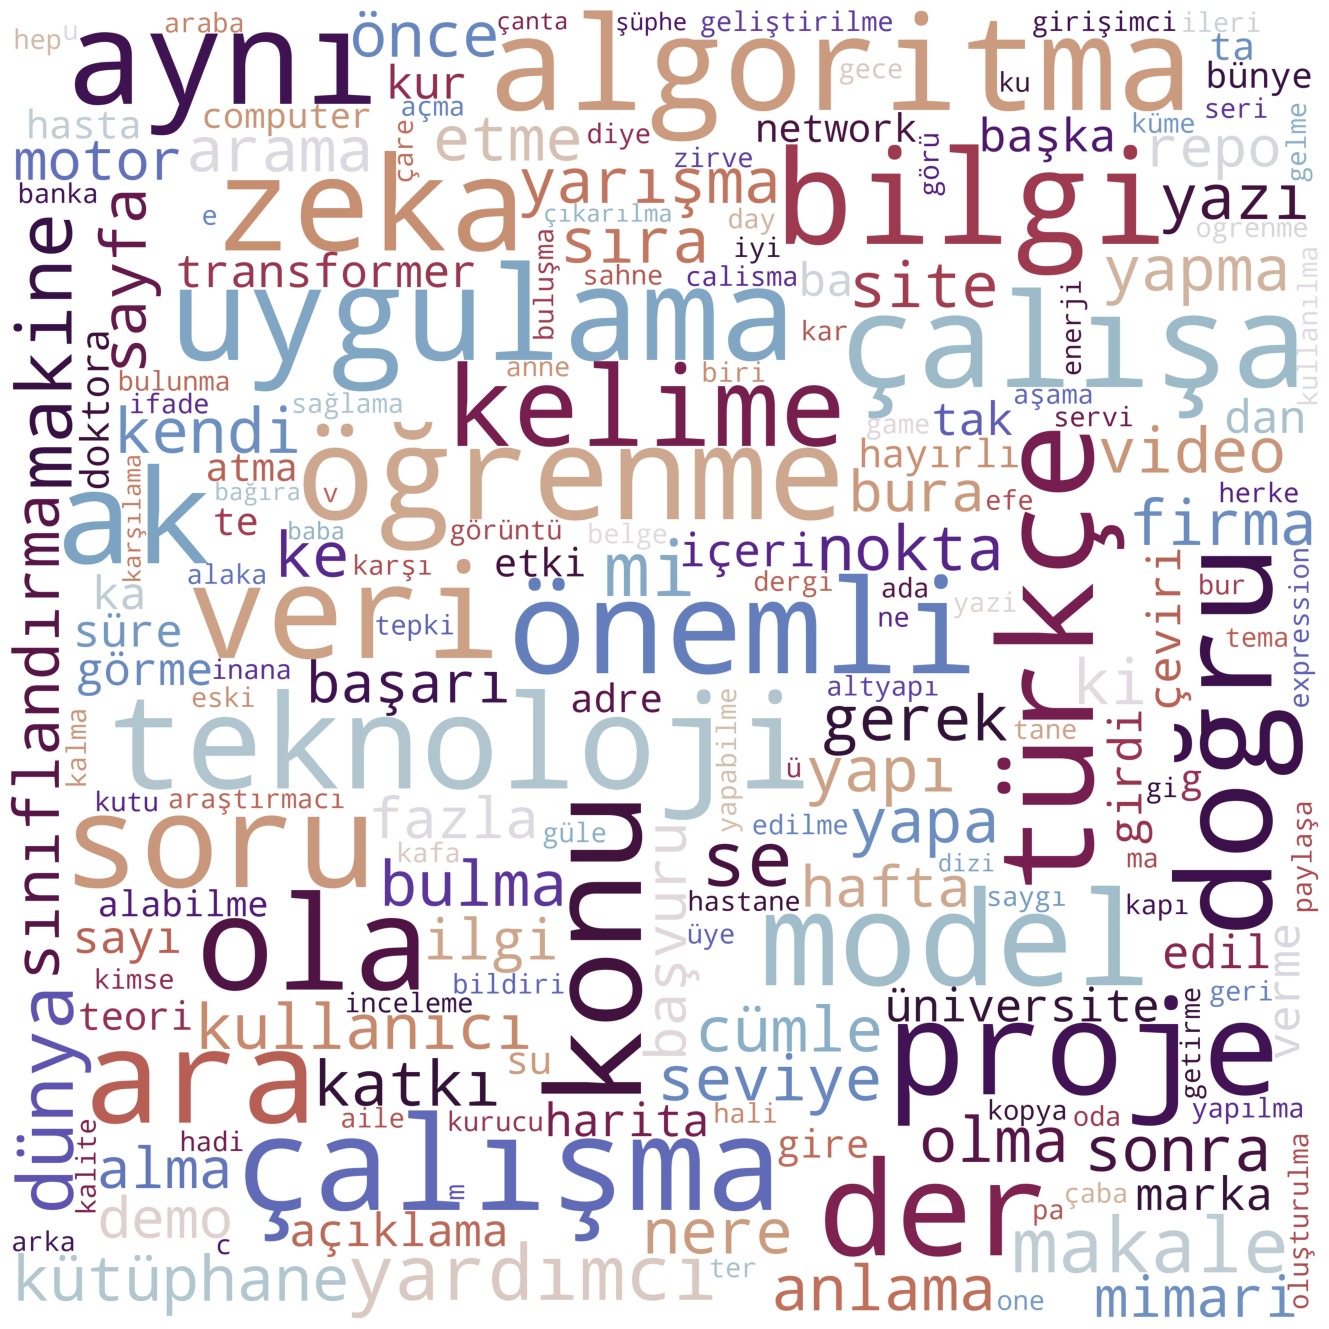

In [ ]:
#A visualization was made so that the more frequently used word is larger.

sentence = []

for i in words:
    sentence.append(i)

text = " ".join(map(str,sentence))

wordcloud = WordCloud(width=3000,height=3000,max_font_size=300,background_color="white",colormap="twilight_shifted").generate(text)

plt.figure(figsize=(20,17))
plt.imshow(wordcloud,interpolation=None)
plt.axis("off")
plt.show()